In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load

In [2]:
data_new = pd.read_pickle("./pickeddata.pkl")
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,autumn
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,autumn
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,autumn
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,autumn
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,winter
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,summer
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,autumn
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,autumn
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,autumn


In [3]:
season = {'spring': 0, 'summer': 1, 'autumn':2, 'winter': 3}
data_new.Season = [season[i] for i in data_new.Season]

In [4]:
data_new

,Date for US Imports and Exports,Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day),Weekly U.S. Exports of Crude Oil (Thousand Barrels per Day),Weekly U.S. Exports of Total Petroleum Products (Thousand Barrels per Day),Date for Retail Gas Price,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Season
0,9-Nov-01,10772,9639,1133,12-Nov-01,1.224,2
1,16-Nov-01,10243,8879,1364,19-Nov-01,1.208,2
2,23-Nov-01,9576,8187,1389,26-Nov-01,1.168,2
3,30-Nov-01,11170,9856,1314,3-Dec-01,1.149,2
4,7-Dec-01,9885,8966,919,10-Dec-01,1.136,3
...,...,...,...,...,...,...,...
1137,25-Aug-23,-1684,2089,-3773,28-Aug-23,3.931,1
1138,1-Sep-23,-2593,1838,-4432,4-Sep-23,3.925,2
1139,8-Sep-23,431,4492,-4061,11-Sep-23,3.941,2
1140,15-Sep-23,-2290,1450,-3741,18-Sep-23,4.001,2


**Baseline Learning**

* Linear Regression is implemented with sklearn to optimize the best function for fitting these data.

* To explore a range of polynomial models, we considered degrees from 1 to 15. The selection criterion for comparing these models was the Mean Absolute Error (MAE).

* Among the evaluated models, the polynomial model with a degree of 9 demonstrated the most promising performance, yielding a MAE of 0.29 on the validation dataset. Consequently, we adopted the polynomial model of degree 9 as our final choice and subjected it to testing with the separate test dataset. The resulting MAE for the test dataset was 0.34.

Train with different model complexity on training dataset and evaluate on validation dataset.


In [5]:
XY=data_new[['Date for US Imports and Exports','Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day)','Season','Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)']].dropna(axis='index')
(feature1,featurename1)=('Date for US Imports and Exports',"Year")
(feature2,featurescale,featurename2)=('Weekly U.S. Exports of Crude Oil and Petroleum Products (Thousand Barrels per Day)',1000,"Exports")
(feature3,featurename3)=('Season','Season')
(label,labelname)=('Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',"Prices (Dollars per Gallon)")


XY.columns=[featurename1,featurename2,featurename3,labelname]
XY[featurename1]=pd.to_datetime(XY[featurename1]).dt.year

print(XY)

X=XY[[featurename1,featurename2,featurename3]].squeeze()
Y=XY[labelname].squeeze()
print(X)
print(Y)

      Year  Exports  Season  Prices (Dollars per Gallon)
0     2001    10772       2                        1.224
1     2001    10243       2                        1.208
2     2001     9576       2                        1.168
3     2001    11170       2                        1.149
4     2001     9885       3                        1.136
...    ...      ...     ...                          ...
1137  2023    -1684       1                        3.931
1138  2023    -2593       2                        3.925
1139  2023      431       2                        3.941
1140  2023    -2290       2                        4.001
1141  2023    -1706       2                        3.963

[1142 rows x 4 columns]
      Year  Exports  Season
0     2001    10772       2
1     2001    10243       2
2     2001     9576       2
3     2001    11170       2
4     2001     9885       3
...    ...      ...     ...
1137  2023    -1684       1
1138  2023    -2593       2
1139  2023      431       2
1140  2023 

In [6]:
SEED = 1024

X_trainvalidate,X_test=train_test_split(X,random_state=SEED,test_size=.15)
Y_trainvalidate,Y_test=train_test_split(Y,random_state=SEED,test_size=.15)

X_train,X_validate=train_test_split(X_trainvalidate,random_state=SEED,test_size=.15)
Y_train,Y_validate=train_test_split(Y_trainvalidate,random_state=SEED,test_size=.15)

In [7]:
def poly_regression(deg,Xtrain,Ytrain,Xvalidate,Yvalidate):
  if deg==1:
    reg_deg = linear_model.LinearRegression()
    reg_deg.fit(Xtrain, Ytrain)
    pred_Y = reg_deg.predict(Xvalidate)
  else:
    poly = PolynomialFeatures(degree=deg, include_bias=True)
    poly_features = poly.fit_transform(Xtrain)
    reg_deg = linear_model.LinearRegression()
    reg_deg.fit(poly_features, Ytrain)
    poly_features_val = poly.fit_transform(Xvalidate)
    pred_Y = reg_deg.predict(poly_features_val)

  MSE=mean_squared_error(Yvalidate, pred_Y)
  MAE=mean_absolute_error(Yvalidate, pred_Y)
  print("Degree: %i" % deg)
  print("Mean squared error: %.2f" % MSE)
  print("Mean absolute error: %.2f" % MAE)
  return reg_deg,MSE,MAE

In [8]:
model_deg = []
model_list=[]
MAE = []
for i in range(1,16):
  model,MSE_val,MAE_val=poly_regression(i,X_train,Y_train,X_validate,Y_validate)
  MAE.append(MAE_val)
  model_deg.append(i)
  model_list.append(model)

Degree: 1
Mean squared error: 0.31
Mean absolute error: 0.45
Degree: 2
Mean squared error: 0.29
Mean absolute error: 0.45
Degree: 3
Mean squared error: 0.18
Mean absolute error: 0.33
Degree: 4
Mean squared error: 0.36
Mean absolute error: 0.48
Degree: 5
Mean squared error: 0.17
Mean absolute error: 0.32
Degree: 6
Mean squared error: 0.54
Mean absolute error: 0.61
Degree: 7
Mean squared error: 0.35
Mean absolute error: 0.47
Degree: 8
Mean squared error: 0.16
Mean absolute error: 0.31
Degree: 9
Mean squared error: 0.15
Mean absolute error: 0.29
Degree: 10
Mean squared error: 0.15
Mean absolute error: 0.29
Degree: 11
Mean squared error: 0.30
Mean absolute error: 0.43
Degree: 12
Mean squared error: 0.24
Mean absolute error: 0.37
Degree: 13
Mean squared error: 0.52
Mean absolute error: 0.58
Degree: 14
Mean squared error: 0.28
Mean absolute error: 0.39
Degree: 15
Mean squared error: 0.20
Mean absolute error: 0.33


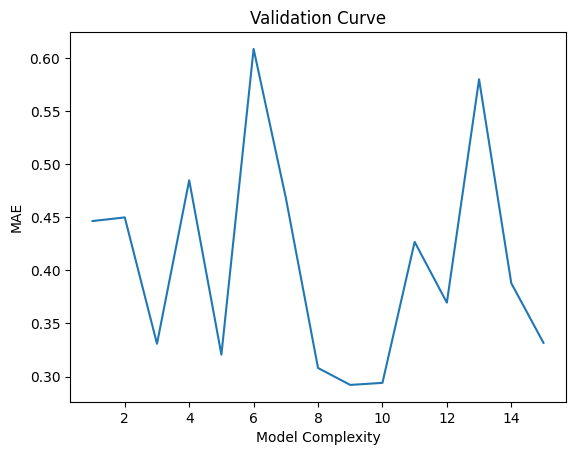

In [9]:
plt.plot(model_deg, MAE)
plt.title("Validation Curve")
plt.xlabel("Model Complexity")
plt.ylabel("MAE")
plt.show()

Test with test dataset

In [10]:
_,MSE_val,MAE_val=poly_regression(9,X_trainvalidate,Y_trainvalidate,X_test,Y_test)

Degree: 9
Mean squared error: 0.19
Mean absolute error: 0.34


In [11]:
best_model=model_list[8]

Save the model

In [12]:
dump(best_model, 'regression_deg9.joblib')

['regression_deg9.joblib']

In [13]:
best_model2=model_list[2]

In [14]:
dump(best_model2, 'regression_deg3.joblib')

['regression_deg3.joblib']